# An introduction to image deconvolution

In microscopy images are commonly distorted because of the nature of the optical system, the microscope. A biological structure emitting photons will visually not appear in an image of the scene 100%ly reflecting reality. The image will be blurred, convolved with the point-spread-function (PSF) of the optical setup. If we know the PSF, it is technically possible to undo this convolution to some degree.

In [2]:
import numpy as np
from skimage.io import imread, imsave
from skimage.data import cells3d
from skimage.filters import gaussian
from scipy.ndimage import convolve
from pyclesperanto_prototype import imshow
import pyclesperanto_prototype as cle
from napari_simpleitk_image_processing import richardson_lucy_deconvolution
import matplotlib.pyplot as plt

To demonstrate convolution and deconvolution, we will for a moment assume that his image showing a nucleus reflects reality in the biological sample.

In [4]:
image = cells3d()[30, 1, 120:190, 80:150]

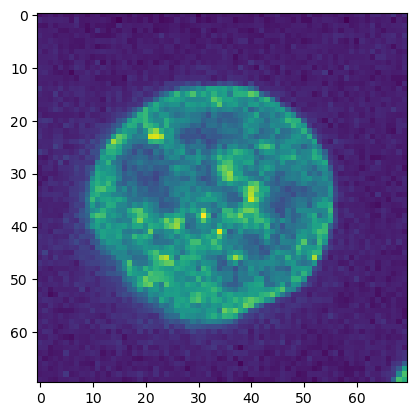

In [6]:
plt.imshow(image)

Construct an artificial PSF.
1. start with a perfect PSF image which is black (0) in all pixels apart from 1

In [8]:
perfect_psf = np.zeros((25, 25))
perfect_psf[12, 12] = 1

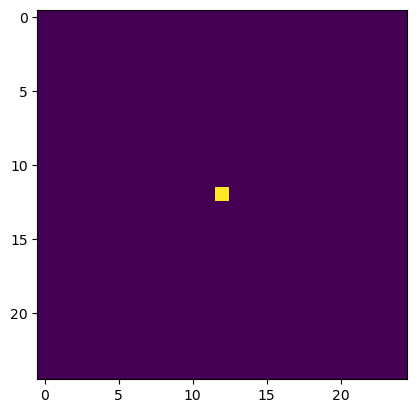

In [19]:
plt.imshow(perfect_psf)

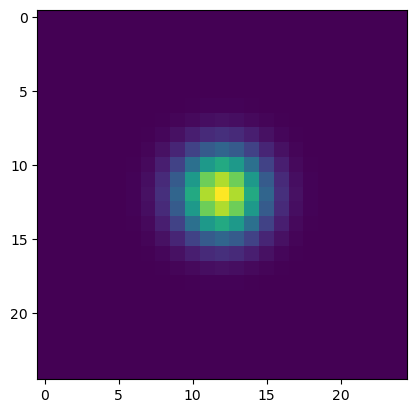

In [23]:
# example PSF by blurring it with a Gaussian blur.
psf = gaussian(perfect_psf, sigma=2)

plt.imshow(psf)

Convolution

Convolution is the process of combining every pixel value of a given input image with neighboring pixels weighted according to the PSF.

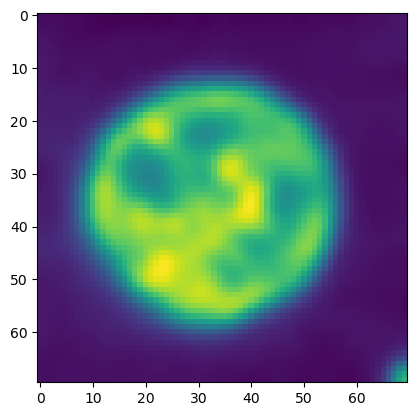

In [25]:
convolved = convolve(image, psf)

plt.imshow(convolved)

Deconvolution

One common algorithm to restore the original image from the convolved image is Richardson-Lucy deconvolution which is implemented as SimpleITK’s RichardsonLucyDeconvolutionImageFilter. Here we use a convenience layer which is part of [napari-simpleitk-image-processing].

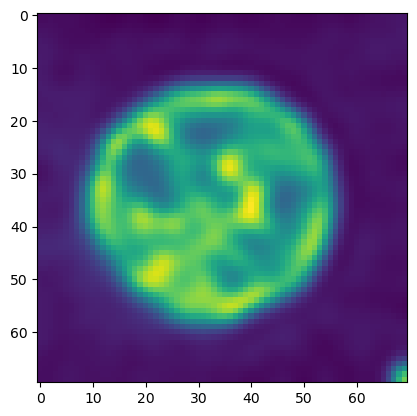

In [27]:
number_of_iterations = 10
deconvolved = richardson_lucy_deconvolution(convolved, psf, number_of_iterations)

plt.imshow(deconvolved)